In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from math import sin
from math import cos

In [2]:
num_lat_zones = 18
zonal_width = 90/num_lat_zones
lats = np.linspace(-85,85,18)


lats_rad = lats*(pi/180)
delta_rad = (pi/2)/num_lat_zones/2
print(lats_rad)
i=0
lats_frac=np.zeros(18)

for i in range(18):
    lats_frac[i] = sin(lats_rad[i]+delta_rad) - sin(lats_rad[i]-delta_rad)

print(lats_frac)

[-1.48352986 -1.30899694 -1.13446401 -0.95993109 -0.78539816 -0.61086524
 -0.43633231 -0.26179939 -0.08726646  0.08726646  0.26179939  0.43633231
  0.61086524  0.78539816  0.95993109  1.13446401  1.30899694  1.48352986]
[0.00760336 0.02257906 0.0368687  0.05003811 0.06168713 0.07146182
 0.07906518 0.08426619 0.0869068  0.0869068  0.08426619 0.07906518
 0.07146182 0.06168713 0.05003811 0.0368687  0.02257906 0.00760336]


In [3]:
solar_constant=1370
max_tilt=23.5
days_in_year=365
hours_in_day=24
zonal_degrees=360

In [4]:
total_solar=0.0

for hour in range(hours_in_day):
    noon_angle=zonal_degrees*(hour/hours_in_day)
    for longitude in range(zonal_degrees):
        sun_angle=longitude-noon_angle
        total_solar=total_solar+solar_constant*max(0,cos((pi/180)*sun_angle))



solar_constant=total_solar/(hours_in_day*zonal_degrees)



In [5]:
print(solar_constant)

436.0734741032062


In [6]:
insolation=np.zeros(num_lat_zones)

for day in range(days_in_year):
    tilt=max_tilt*cos(2.0*pi*day/days_in_year)
    for j in range(num_lat_zones):
        zenith=min(lats[j]+tilt,90.0)
        insolation[j]=insolation[j]+cos(zenith*pi/180)

insolation=solar_constant*insolation/days_in_year
f_result=insolation

avg_insolation=sum(lats_frac,insolation)
print(avg_insolation)

[ 37.4255851  109.16810591 177.6240225  240.7133365  296.51911101
 343.34571582 379.77034823 404.68626423 417.33640631 417.33640631
 404.68626423 379.77034823 343.34571582 296.51911101 240.7133365
 177.6240225  121.03847866  76.16816158]


In [7]:
F=3.80
A=204
B=2.17
albedo_ice=0.60
albedo_land=0.30
temp_critical=-10

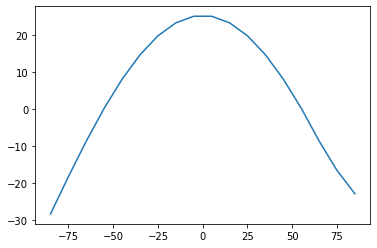

In [8]:
def solve_temp(solar_mult):
    step_num=1
    max_temp_diff=1.0E6
    tol_temp_diff=0.05
    max_steps=100
    temp=np.zeros(num_lat_zones)
    albedo=np.zeros(num_lat_zones)
    while step_num < max_steps:
        temp_old=temp
        step_num=step_num+1
    for j in range(num_lat_zones):
        if temp_old[j]>temp_critical:
            albedo[j]=albedo_land
        else:
            albedo[j]=albedo_ice
        
    temp_avg=sum(lats_frac,temp)
    temp=(solar_mult*insolation*(1-albedo)+F*temp_avg -A)/(B+F)
    max_temp_diff=max(abs(temp_old-temp))
    return temp

plt.plot(lats,solve_temp(1.2))

In [9]:
temp=np.zeros(num_lat_zones)
temp_avg=np.zeros(num_lat_zones)
for j in range(num_lat_zones):
    temp[j]=-60.0

solar_mult=np.zeros(140)
#for k in range(140):
#    solar_mult[k]=k/100
#    temp_avg=solve_temp(solar_mult);
#    k=k+1
    
#plt.plot(solve_temp(2))
#plt.plot(solar_mult,temp_avg)
#plt.title('Average Temperature versus Solar Multiplier')
#xlabel('Solar Multiplier')
#ylabel('Average Temperature')


In [10]:
#for k in range(60:140):
#    solar_mult[k]=k/100;
#    temp_avg[k]=solve_temp(solar_mult[k])
    
#plt.plot(solar_mult,temp_avg)
#plt.title('Average Temperature versus Solar Multiplier')
#xlabel('Solar Multiplier')
#ylabel('Average Temperature')